A.1.1 Per type (Noisy Tournament)
-----------

Each tournament type.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tools

%matplotlib inline

In [2]:
import itertools

In [3]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

Noisy
-------

In [4]:
noisy_tournaments = pd.read_csv('data/raw_noise.csv')

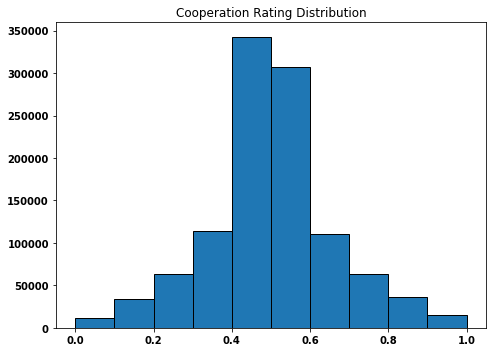

In [5]:
figure = plt.figure(figsize=(7, 5))
plt.hist(noisy_tournaments['Cooperation_rating'], edgecolor='black');
plt.title('Cooperation Rating Distribution');
plt.tight_layout()
plt.savefig('../images/cooperation_distribution_noise.pdf')

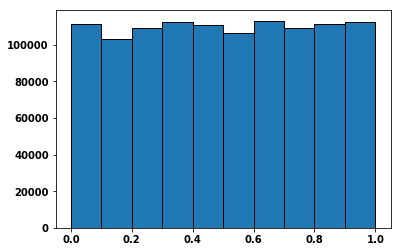

In [7]:
plt.hist(noisy_tournaments['noise'], edgecolor='black');

In [8]:
winners = noisy_tournaments[noisy_tournaments['Rank'] == 0]

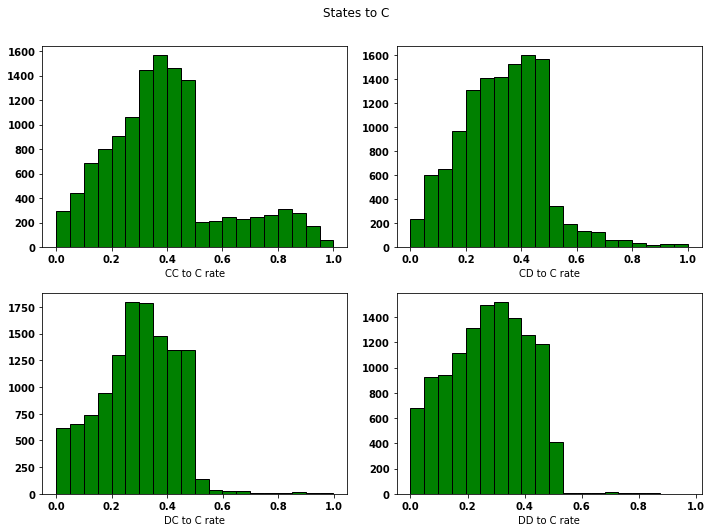

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(winners[label], bins=20, color='green', edgecolor='DD_to_C_rate']):
    axes[index[0]][index[1]].hist(winners[label], bins=20, color='green')'black'); 
    axes[index[0]][index[1]].set_xlabel(label.replace('_', ' '))

plt.tight_layout()
plt.savefig('../images/states_to_c_noise_winner.pdf')

In [11]:
losers = noisy_tournaments.loc[noisy_tournaments.groupby(['seed'], sort=False)['Rank'].idxmax()]

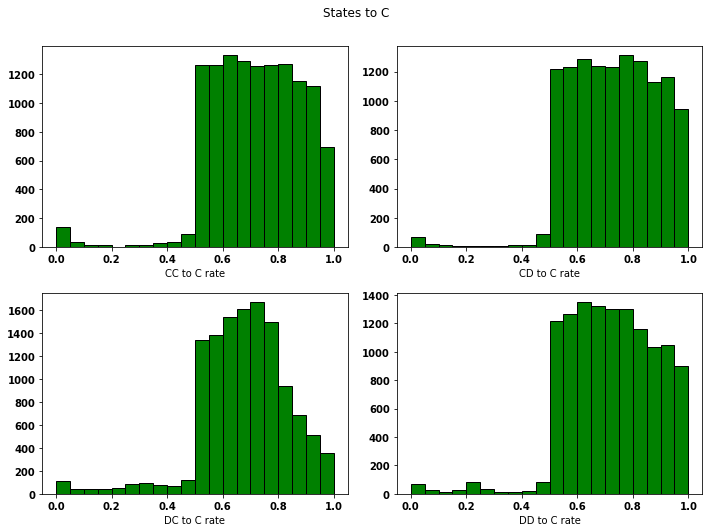

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(losers[label], bins=20, color='green', edgecolor='black'); 
    axes[index[0]][index[1]].set_xlabel(label.replace('_', ' '))

plt.tight_layout()
plt.savefig('../images/states_to_c_noise_loser.pdf')

Fixed data set
--------------

In [15]:
df, name = pd.read_csv('data/noise_tournaments.csv'), 'noise'

In [16]:
df.columns

Index(['index', 'cc_to_c', 'cd_to_c', 'dc_to_c', 'dd_to_c', 'loser coop',
       'max coop', 'mean coop', 'median coop', 'min coop', 'norm rank C',
       'norm rank D', 'size', 'std', 'winner coop'],
      dtype='object')

**V. $r$ distribution**

/home/nightwing/rsc/axlml/src/tools.py:28: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, 4)])


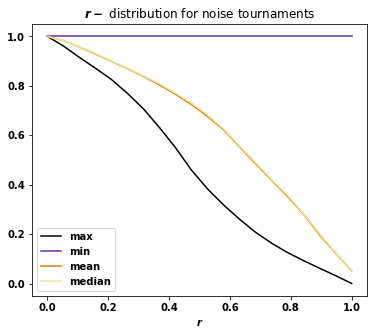

In [17]:
tools.r_distribution(df['winner coop'], df['max coop'], df['min coop'], df['mean coop'], 
                     df['median coop'], title='$r-$ distribution for {} tournaments'.format(name))

plt.savefig('../images/r_distribution_noise.pdf')

Based on the analysis above, the following points are made for the noise tournaments:

- the mean/median $C$ has been $\simeq 0.5$
- players that defect more $\simeq 0.4 - 0.2$ do better
- cooperators perform poorly
- the more you cooperative the less well you will do, but the $r-$ distribution is decreasing smoothly

that could be because a less cooperative player does perform well but not a complete defector.

In [19]:
noisy_tournaments['Normalized_Rank'] = noisy_tournaments.apply(lambda row: row['Rank'] / (row['size'] - 1), axis=1)

In [20]:
top = noisy_tournaments[noisy_tournaments['Normalized_Rank'] <=0.5]
low = noisy_tournaments[noisy_tournaments['Normalized_Rank'] >0.5]

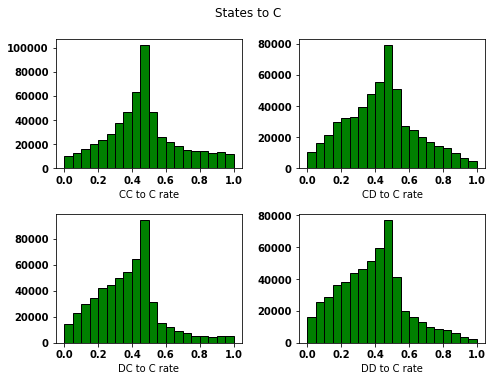

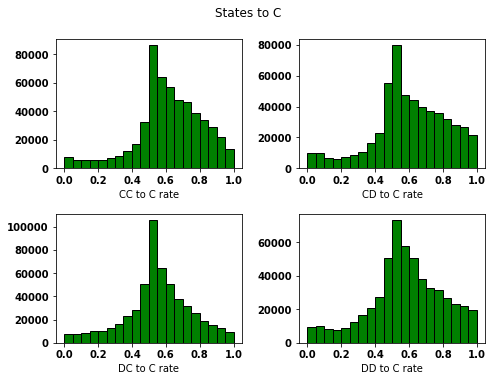

In [21]:
for dset in [top, low]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    fig.suptitle('States to C', y=1.05)

    for index, label in zip(itertools.product((0, 1), repeat=2),
                            ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
        axes[index[0]][index[1]].hist(dset[label], bins=20, color='green', edgecolor='black'); 
        axes[index[0]][index[1]].set_xlabel(label.replace('_', ' '))

    plt.tight_layout()